In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.stats import linregress

# === Parameters ===
START_DATE = "2005-12-31"
END_DATE = "2025-07-31"
REBALANCE_MONTHS = [3, 6, 9, 12]  # Quarterly
TOP_N = 10  # Top 10 momentum stocks

# Step 1: Load NSE500 list
nse500 = pd.read_html("https://en.wikipedia.org/wiki/NIFTY_50", header=0)[1]
nse500 
symbols = nse500['Symbol'].tolist()

In [2]:
# Step 2: Download adjusted close price history
data = {}
for symbol in tqdm(symbols):
    try:
        df = yf.download(symbol + ".NS", start=START_DATE, end=END_DATE, interval="1d", progress=False)
        if df.empty:
            continue
        df = df[['Close']].rename(columns={'Close': symbol})
        data[symbol] = df
    except:
        continue

if not data:
    raise ValueError("No valid price data downloaded.")

prices = pd.concat(data.values(), axis=1)
prices.index = pd.to_datetime(prices.index)
prices = prices.dropna(axis=1, how='all')

prices

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\amitt\AppData\Local\Temp\ipykernel_27576\1169636767.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol + ".NS", start=START_DATE, end=END_DATE, interval="1d", progress=False)
  2%|▏         | 1/50 [00:01<01:19,  1.63s/it]C:\Users\amitt\AppData\Local\Temp\ipykernel_27576\1169636767.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol + ".NS", start=START_DATE, end=END_DATE, interval="1d", progress=False)
  4%|▍         | 2/50 [00:02<00:47,  1.00it/s]C:\Users\amitt\AppData\Local\Temp\ipykernel_27576\1169636767.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol + ".NS", start=START_DATE, end=END_DATE, interval="1d", progress=False)
  6%|▌         | 3/50 [00:02<00:35,  1.31it/s]C:\Users\amitt\AppData\Local\Temp\ipykernel_27576\1169636767.py:5: FutureWarning: YF.download()

Price,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BEL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,TRENT,ULTRACEMCO,WIPRO
Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BEL.NS,BHARTIARTL.NS,...,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-02,3.578888,NaN,223.895721,47.873142,50.409939,313.918610,3.736514,1962.401733,7.271636,140.857361,...,55.032558,158.308701,69.148201,104.642990,18.934368,NaN,36.133213,65.157700,387.105499,46.737854
2006-01-03,3.620712,NaN,223.717743,48.230194,50.637241,315.719391,3.702060,1973.658691,7.310606,143.508377,...,55.020454,162.586288,69.905525,105.608353,19.294073,NaN,36.122417,65.868309,400.316345,47.881756
2006-01-04,3.641624,NaN,225.586868,47.913712,51.843735,321.145081,3.689152,2007.576660,7.291490,142.887039,...,55.016418,163.515030,70.011612,107.858101,19.196653,NaN,37.158634,66.565186,404.077789,48.701706
2006-01-05,3.614736,NaN,232.195602,47.877186,53.102661,324.041962,3.662153,2025.685791,7.252156,141.851486,...,54.512207,162.507507,69.590889,105.870140,19.004314,NaN,34.934940,66.773659,411.050201,47.988037
2006-01-06,3.641624,NaN,239.249390,47.925880,54.877415,320.479584,3.643517,2003.416748,7.273110,143.839752,...,54.826832,159.997223,69.166496,105.878311,19.194157,NaN,33.611980,66.892342,430.820618,47.851376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-14,2581.300049,1433.000000,7220.000000,2401.600098,1172.699951,8087.500000,918.849976,2003.599976,407.299988,1904.974609,...,1682.599976,3211.800049,1071.800049,674.500000,160.440002,1576.699951,3404.699951,5314.500000,12516.000000,254.250000
2025-07-15,2598.199951,1445.099976,7360.500000,2393.500000,1165.900024,8311.000000,928.400024,2036.500000,408.950012,1918.164307,...,1727.500000,3241.300049,1081.800049,684.400024,159.000000,1579.000000,3415.000000,5390.000000,12502.000000,257.399994


In [3]:
# Step 3: Calculate momentum scores (12-month return)
monthly_prices = prices.resample('Q').last()
momentum_scores = pd.DataFrame(index=monthly_prices.index, columns=monthly_prices.columns)

for i in range(4, len(monthly_prices)):
    date = monthly_prices.index[i]
    past_returns = monthly_prices.iloc[i] / monthly_prices.iloc[i - 4] - 1
    momentum_scores.loc[date] = past_returns


C:\Users\amitt\AppData\Local\Temp\ipykernel_27576\2727770852.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  monthly_prices = prices.resample('Q').last()


In [4]:
monthly_prices

Price,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BEL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,TRENT,ULTRACEMCO,WIPRO
Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BEL.NS,BHARTIARTL.NS,...,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-31,3.575900,NaN,225.542389,52.425514,62.256187,430.028168,4.443853,2688.238037,9.735342,170.971573,...,69.344353,180.020081,63.433395,152.469009,26.802874,NaN,37.649734,65.721458,626.643982,56.658379
2006-06-30,7.764215,NaN,178.413437,48.766335,47.330544,430.419617,3.465011,2690.685791,7.874145,153.263412,...,63.547829,163.885468,56.042961,132.256561,27.349737,NaN,26.776594,50.681850,685.955200,52.508652
2006-09-30,8.271672,NaN,214.187683,55.689423,66.981667,469.198456,3.278351,2933.104004,8.588292,194.375275,...,75.617889,192.969803,55.787891,143.379852,27.452240,122.518303,36.487267,64.125252,820.937012,53.690063
2006-12-31,14.018533,NaN,193.218826,61.150715,82.949890,410.125916,3.370116,2563.822998,9.986594,260.941284,...,79.758652,231.358765,53.627911,149.852493,21.846992,331.368011,38.893375,64.230484,1011.194031,61.975250
2007-03-31,13.098172,NaN,225.825180,63.915035,86.623985,380.131561,3.912244,2376.320068,11.192183,316.426727,...,86.401085,234.143295,45.158981,121.166534,20.370468,283.034119,38.117722,49.562096,713.786804,57.218941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,3134.247559,1441.188354,7188.981934,3293.021484,1231.147827,12040.789062,770.299988,1972.439087,283.529663,1695.376831,...,1908.874268,4196.322754,1188.144165,966.341614,164.708893,1535.110352,3812.476318,7568.093262,11802.000000,265.450287
2024-12-31,2527.357666,1225.139404,7286.044922,2260.494385,1063.790771,8581.120117,682.299988,1567.336304,291.535309,1574.586670,...,1868.897583,4035.380859,907.970642,733.840576,134.903961,1675.584473,3243.388916,7117.184082,11426.349609,295.968842


In [5]:
momentum_scores

Price,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BEL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,TRENT,ULTRACEMCO,WIPRO
Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BEL.NS,BHARTIARTL.NS,...,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-31,2.662902,NaN,0.001254,0.219159,0.391412,-0.116031,-0.119628,-0.116031,0.149645,0.850756,...,0.245971,0.300651,-0.288088,-0.205304,-0.239989,NaN,0.01243,-0.245877,0.139063,0.009894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,0.299604,0.762605,0.404646,0.065209,0.189497,1.457944,-0.013795,0.282029,1.082308,0.855653,...,0.677666,0.224469,0.37439,0.546573,0.333948,0.327885,0.218389,2.643895,0.438184,0.333457
2024-12-31,-0.112069,0.206992,0.282263,-0.32184,-0.033365,0.304955,-0.068882,-0.069232,0.607571,0.546792,...,0.511072,0.092484,-0.152552,-0.051029,0.008821,0.37777,-0.112001,1.33334,0.094359,0.280925


In [6]:
# Step 4: Backtest quarterly rebalancing
portfolio_returns = []
benchmark_returns = []
bottom10_cumulative = []

for i in range(4, len(momentum_scores)):
    date = momentum_scores.index[i]
    if date.month not in REBALANCE_MONTHS:
        continue

    scores = momentum_scores.loc[date].dropna()
    top_stocks = scores.sort_values(ascending=False).head(TOP_N).index
    

    try:
        next_date = momentum_scores.index[i + 1]
    except IndexError:
        break

    try:
        next_returns = monthly_prices.loc[next_date, top_stocks] / monthly_prices.loc[date, top_stocks] - 1
        portfolio_returns.append((next_date, next_returns.mean()))
    except:
        continue

perf_df = pd.DataFrame(portfolio_returns, columns=["Date", "Return"]).set_index("Date")
perf_df
perf_df["Cumulative"] = (1 + perf_df["Return"]).cumprod()

perf_df

,Return,Cumulative
Date,,
2009-09-30,0.261587,1.261587
2009-12-31,0.145892,1.445643
2010-03-31,0.048133,1.515226
2010-06-30,0.042188,1.579151
2010-09-30,0.317893,2.081153
...,...,...
2024-09-30,0.115321,51.900558
2024-12-31,-0.145727,44.337251
2025-03-31,-0.066050,41.408755


In [29]:
nav = perf_df["Cumulative"]
nav

Date
2009-09-30     1.261587
2009-12-31     1.445643
2010-03-31     1.515226
2010-06-30     1.579151
2010-09-30     2.081153
                ...    
2024-09-30    51.900558
2024-12-31    44.337251
2025-03-31    41.408755
2025-06-30    46.551510
2025-09-30    44.530153
Name: Cumulative, Length: 65, dtype: float64

In [31]:
nav = perf_df["Cumulative"]
rolling_max = nav.cummax()
rolling_max

Date
2009-09-30     1.261587
2009-12-31     1.445643
2010-03-31     1.515226
2010-06-30     1.579151
2010-09-30     2.081153
                ...    
2024-09-30    51.900558
2024-12-31    51.900558
2025-03-31    51.900558
2025-06-30    51.900558
2025-09-30    51.900558
Name: Cumulative, Length: 65, dtype: float64

In [33]:
nav = perf_df["Cumulative"]
rolling_max = nav.cummax()
drawdown = (nav - rolling_max) / rolling_max
drawdown

Date
2009-09-30    0.000000
2009-12-31    0.000000
2010-03-31    0.000000
2010-06-30    0.000000
2010-09-30    0.000000
                ...   
2024-09-30    0.000000
2024-12-31   -0.145727
2025-03-31   -0.202152
2025-06-30   -0.103063
2025-09-30   -0.142010
Name: Cumulative, Length: 65, dtype: float64

In [35]:
max_drawdown = drawdown.min()
max_drawdown

-0.23736312053242895

In [7]:
# Step 5: Compute performance stats
nav = perf_df["Cumulative"]
rolling_max = nav.cummax()
drawdown = (nav - rolling_max) / rolling_max
max_drawdown = drawdown.min()
volatility = perf_df["Return"].std() * np.sqrt(4)  # Quarterly to annual
sharpe = perf_df["Return"].mean() / perf_df["Return"].std() * np.sqrt(4)

# Alpha vs linear time trend
x = np.arange(len(perf_df))
y = np.log(perf_df["Cumulative"])
slope, intercept, r_value, p_value, std_err = linregress(x, y)
alpha = slope * 4  # Quarterly to annual

# Step 6: Plot
plt.figure(figsize=(10, 5))
perf_df["Cumulative"].plot()
plt.title(f"Price Momentum Strategy on NSE500 (Quarterly Rebalance)\nMax Drawdown: {max_drawdown:.2%}, Sharpe: {sharpe:.2f}, Alpha: {alpha:.2%}, Volatility: {volatility:.2%}")
plt.ylabel("Cumulative NAV")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Export
# perf_df.to_csv("momentum_strategy_nse500.csv")

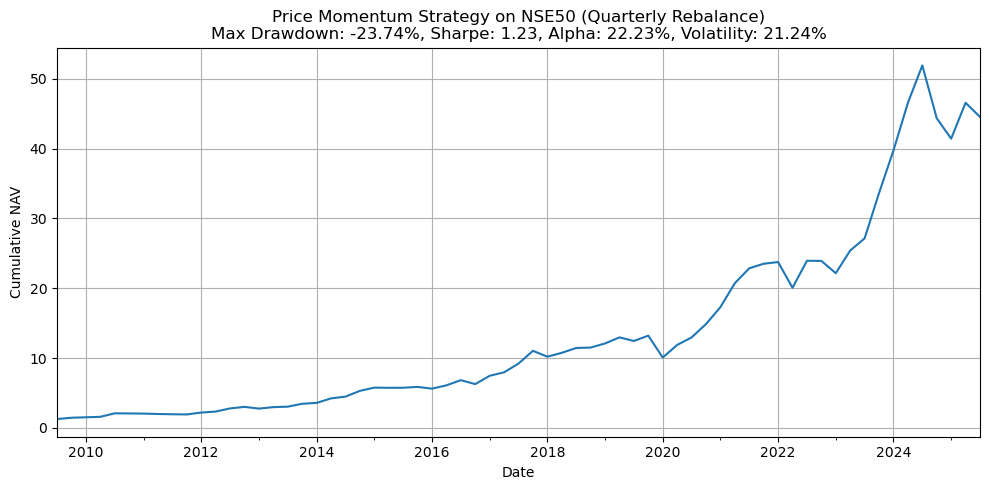

In [8]:
# Step 6: Plot
plt.figure(figsize=(10, 5))
perf_df["Cumulative"].plot()
plt.title(f"Price Momentum Strategy on NSE50 (Quarterly Rebalance)\nMax Drawdown: {max_drawdown:.2%}, Sharpe: {sharpe:.2f}, Alpha: {alpha:.2%}, Volatility: {volatility:.2%}")
plt.ylabel("Cumulative NAV")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Export
# perf_df.to_csv("momentum_strategy_nse500.csv")

In [45]:
benchmark = yf.download("^NSEI", start=START_DATE, end=END_DATE, interval="1mo")["Close"].resample("Q").last()
benchmark_ret = benchmark.pct_change().reindex(perf_df.index)
strategy_ret = perf_df["Return"]
risk_free_rate = 7.0  # Assuming 0 for now

excess_return = strategy_ret - risk_free_rate
excess_benchmark = benchmark_ret - risk_free_rate

X = add_constant(excess_benchmark.dropna())
model = OLS(excess_return.loc[X.index], X).fit()
capm_alpha = model.params['const']

C:\Users\amitt\AppData\Local\Temp\ipykernel_27576\990351684.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark = yf.download("^NSEI", start=START_DATE, end=END_DATE, interval="1mo")["Close"].resample("Q").last()
[*********************100%***********************]  1 of 1 completed
C:\Users\amitt\AppData\Local\Temp\ipykernel_27576\990351684.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  benchmark = yf.download("^NSEI", start=START_DATE, end=END_DATE, interval="1mo")["Close"].resample("Q").last()


In [47]:
capm_alpha

0.6042044511773312

In [49]:
strategy_ret

Date
2009-09-30    0.261587
2009-12-31    0.145892
2010-03-31    0.048133
2010-06-30    0.042188
2010-09-30    0.317893
                ...   
2024-09-30    0.115321
2024-12-31   -0.145727
2025-03-31   -0.066050
2025-06-30    0.124195
2025-09-30   -0.043422
Name: Return, Length: 65, dtype: float64

In [51]:
excess_benchmark

Ticker,^NSEI
Date,
2009-09-30,-6.815234
2009-12-31,-6.976967
2010-03-31,-6.990761
2010-06-30,-6.987922
2010-09-30,-6.864951
...,...
2024-09-30,-6.925023
2024-12-31,-7.083920
2025-03-31,-7.005306


In [60]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import linregress
from statsmodels.api import OLS, add_constant

# === Parameters ===
START_DATE = "2005-12-31"
END_DATE = "2025-07-31"
REBALANCE_MONTHS = [3, 6, 9, 12]  # Quarterly
TOP_N = 100  # Top 100 momentum stocks

# Step 1: Load NSE500 list
nse500 = pd.read_html("https://en.wikipedia.org/wiki/NIFTY_50", header=0)[1]
symbols = nse500['Symbol'].tolist()

# Step 2: Download adjusted close price history
data = {}
for symbol in tqdm(symbols):
    try:
        df = yf.download(symbol + ".NS", start=START_DATE, end=END_DATE, interval="1D", progress=False)
        if df.empty or 'Adj Close' not in df.columns:
            continue
        df = df[['Close']].rename(columns={'Close': symbol})
        data[symbol] = df
    except:
        continue

if not data:
    raise ValueError("No valid price data downloaded.")

prices = pd.concat(data.values(), axis=1)
prices.index = pd.to_datetime(prices.index)
prices = prices.dropna(axis=1, how='all')

# Step 3: Calculate momentum scores (12-month return)
monthly_prices = prices.resample('Q').last()
momentum_scores = pd.DataFrame(index=monthly_prices.index, columns=monthly_prices.columns)

for i in range(4, len(monthly_prices)):
    date = monthly_prices.index[i]
    past_returns = monthly_prices.iloc[i] / monthly_prices.iloc[i - 4] - 1
    momentum_scores.loc[date] = past_returns

# Step 4: Backtest quarterly rebalancing
portfolio_returns = []
benchmark_returns = []
bottom10_cumulative = []

for i in range(4, len(momentum_scores)):
    date = momentum_scores.index[i]
    if date.month not in REBALANCE_MONTHS:
        continue

    scores = momentum_scores.loc[date].dropna()
    top_stocks = scores.sort_values(ascending=False).head(int(len(scores)*0.1)).index
    bottom10 = scores.sort_values(ascending=True).head(int(len(scores)*0.1)).index

    try:
        next_date = momentum_scores.index[i + 1]
    except IndexError:
        break

    try:
        next_returns = monthly_prices.loc[next_date, top_stocks] / monthly_prices.loc[date, top_stocks] - 1
        portfolio_returns.append((next_date, next_returns.mean()))

        bottom10_returns = monthly_prices.loc[next_date, bottom10] / monthly_prices.loc[date, bottom10] - 1
        bottom10_cumulative.append((next_date, bottom10_returns.mean()))
    except:
        continue

perf_df = pd.DataFrame(portfolio_returns, columns=["Date", "Return"]).set_index("Date")
perf_df["Cumulative"] = (1 + perf_df["Return"]).cumprod()

bottom10_df = pd.DataFrame(bottom10_cumulative, columns=["Date", "Return"]).set_index("Date")
bottom10_df["Cumulative"] = (1 + bottom10_df["Return"]).cumprod()

# Step 5: Compute performance stats
nav = perf_df["Cumulative"]
rolling_max = nav.cummax()
drawdown = (nav - rolling_max) / rolling_max
max_drawdown = drawdown.min()
volatility = perf_df["Return"].std() * np.sqrt(4)  # Quarterly to annual
sharpe = perf_df["Return"].mean() / perf_df["Return"].std() * np.sqrt(4)

# Alpha vs linear time trend
x = np.arange(len(perf_df))
y = np.log(perf_df["Cumulative"])
slope, intercept, r_value, p_value, std_err = linregress(x, y)
alpha = slope * 4  # Quarterly to annual

# Alpha vs benchmark using CAPM-style regression
benchmark = yf.download("^NSEI", start=START_DATE, end=END_DATE, interval="1mo")["Adj Close"].resample("Q").last()
benchmark_ret = benchmark.pct_change().reindex(perf_df.index)
strategy_ret = perf_df["Return"]
risk_free_rate = 0.0  # Assuming 0 for now

excess_return = strategy_ret - risk_free_rate
excess_benchmark = benchmark_ret - risk_free_rate

X = add_constant(excess_benchmark.dropna())
model = OLS(excess_return.loc[X.index], X).fit()
capm_alpha = model.params['const']

# Jensen's Alpha (same as CAPM alpha here, but naming for clarity)
jensens_alpha = capm_alpha

# Step 6: Plot
plt.figure(figsize=(12, 6))
plt.plot(perf_df["Cumulative"], label="Top 100 Momentum")
plt.plot(bottom10_df["Cumulative"], label="Bottom 10% Momentum")
plt.plot((1 + benchmark_ret).cumprod(), label="Nifty 50", linestyle='--')
plt.title(f"NSE500 Momentum Strategy vs Nifty 50\nMax Drawdown: {max_drawdown:.2%}, Sharpe: {sharpe:.2f}, Alpha: {alpha:.2%}, CAPM Alpha: {capm_alpha:.2%}, Jensen's Alpha: {jensens_alpha:.2%}, Volatility: {volatility:.2f}")
plt.ylabel("Cumulative NAV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Export
# perf_df.to_csv("momentum_strategy_nse500.csv")


  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\amitt\AppData\Local\Temp\ipykernel_27576\182803520.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol + ".NS", start=START_DATE, end=END_DATE, interval="1mo", progress=False)
  2%|▏         | 1/50 [00:00<00:18,  2.63it/s]C:\Users\amitt\AppData\Local\Temp\ipykernel_27576\182803520.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol + ".NS", start=START_DATE, end=END_DATE, interval="1mo", progress=False)
  4%|▍         | 2/50 [00:00<00:14,  3.34it/s]C:\Users\amitt\AppData\Local\Temp\ipykernel_27576\182803520.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol + ".NS", start=START_DATE, end=END_DATE, interval="1mo", progress=False)
  6%|▌         | 3/50 [00:00<00:15,  3.10it/s]C:\Users\amitt\AppData\Local\Temp\ipykernel_27576\182803520.py:23: FutureWarning: YF.downloa

ValueError: No valid price data downloaded.